In [14]:
import psycopg2 as pg
import pandas as pd

In [15]:
dff = pd.read_excel(r"C:\\Users\\saulo\\Downloads\\arrecadacao-do-mei-por-municipio-2015-a-2022 (1).xlsx")

In [16]:
dff

,ARRECADAÇÃO DO MEI (MICROEMPREENDEDOR INDIVIDUAL) POR MUNICÍPIO,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,"UNIDADE: R$ 1,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ESTADO,UF,MUNICÍPIO,2017,NaN,NaN,2016,NaN,NaN,2015,NaN,NaN
2,NaN,NaN,NaN,ICMS - Simples Nacional - MEI,ISS - Simples Nacional - MEI,INSS - SImples Nacional - MEI,ICMS - Simples Nacional - MEI,ISS - Simples Nacional - MEI,INSS - SImples Nacional - MEI,ICMS - Simples Nacional - MEI,ISS - Simples Nacional - MEI,INSS - SImples Nacional - MEI
3,ACRE,AC,Brasiléia - AC,1694.27,3768.85,84885.48,1604,3890,73730.4,1734,3730,69706.55
4,ACRE,AC,Cruzeiro do Sul - AC,6640.55,11743.02,346935.56,5646,10263.29,279401.27,6373.5,10540,268688.7
...,...,...,...,...,...,...,...,...,...,...,...,...
5568,TOCANTINS,TO,Praia Norte - TO,388,359.26,18093.2,469,575,20832.8,421,445,16330.6
5569,TOCANTINS,TO,Sampaio - TO,518.6,852.96,23678.45,400,745,16872.2,394,700,15264.6
5570,TOCANTINS,TO,Santa Rosa do Tocantins - TO,368.75,993.77,22178.21,279,775,13514.4,356,945,15118.5
5571,TOCANTINS,TO,Santa Tereza do Tocantins - TO,195,490,10343.65,176,455,8888.3,166,550,8443


In [2]:
def connectionDataBase():
    connection = pg.connect(user="postgres", password="2023@Tag", host="159.65.42.225", port=5432, database="comercial_BI")
    return connection

In [3]:
conn = connectionDataBase()

cursor = conn.cursor()

query = '''SELECT tt.cnpj_ as cnpj,tt.nome_fantasia,tt.idade,tt.cna_name,tt.razao_social,tt.porte,tt.capital_social,tt.cod_nat_juri_,tt.qual_respons_,tt.uf,tt.data_situacao_cadastral,tt.data_incio_atividade,tt.telefone, tt.muni_name,tt.logradouro ,tt.tipo_logradouro ,tt.complemento,tt.bairro ,tt.cep,tt.cep_lat,tt.cep_long
                        FROM (
                        SELECT cc.cnpj_,cc.cnpj,cna.cna_name,cc.nome_fantasia,cc.idade,ee.razao_social,ee.porte,ee.capital_social,ee.cod_nat_juri_,ee.qual_respons_,cc.uf,cc.data_situacao_cadastral,cc.data_incio_atividade,cc.telefone, mm.muni_name,cc.logradouro ,cc.tipo_logradouro ,cc.complemento,cc.bairro ,cc.cep,cp.cep_lat,cp.cep_long from cnp_cnpj cc
                        left join mun_municipio mm on mm.muni_cod = cc.muncipio
                        left join em_empresas ee on ee.cnpj = cc.cnpj
                        left join cep_lat_long cp on cp.cep=cc.cep
                        left join cnae_cnaes_ cna on cna.cna_subclass = cc.cnae_principal
                        WHERE cc.cnae_principal IN ('4530703', '4530704', '4541205') AND cc.uf IN ('MG', 'ES', 'RJ', 'SP') AND  cc.sit_cadastral = 'Ativa' ) AS tt limit 100'''
query=cursor.execute(query)
query=cursor.fetchall()

nomes_colunas = [desc[0] for desc in cursor.description]
df_size = pd.DataFrame(query,columns=nomes_colunas)
df_size

,cnpj,nome_fantasia,idade,cna_name,razao_social,porte,capital_social,cod_nat_juri_,qual_respons_,uf,...,data_incio_atividade,telefone,muni_name,logradouro,tipo_logradouro,complemento,bairro,cep,cep_lat,cep_long
0,15659880/0001-80,Não Informado,12 anos,Comércio a varejo de peças e acessórios novos ...,DICESAR DE FREITAS 14683303817,Micro Empresa,5000.0,Empresário (Individual),Empresário,SP,...,2012-06-05,1158148093,SAO PAULO,DIOGO CORREIA DE SANDE,AVENIDA,Não Informado,JARDIM LIDIA,05862160,NaN,NaN
1,15659880/0001-80,Não Informado,12 anos,Comércio a varejo de peças e acessórios novos ...,DICESAR DE FREITAS 14683303817,Micro Empresa,5000.0,Empresário (Individual),Empresário,SP,...,2012-06-05,1158148093,SAO PAULO,DIOGO CORREIA DE SANDE,AVENIDA,Não Informado,JARDIM LIDIA,05862160,NaN,NaN
2,16505704/0001-56,FUNDICAO MONTE NEGRO,12 anos,Comércio a varejo de peças e acessórios novos ...,RENATA DE FREITAS FERREIRA,Micro Empresa,20000.0,Empresário (Individual),Empresário,SP,...,2012-07-06,16992175388,SAO JOAQUIM DA BARRA,TIBIRICA,RUA,Não Informado,JARDIM PAULISTA,14600000,NaN,NaN
3,16505704/0001-56,FUNDICAO MONTE NEGRO,12 anos,Comércio a varejo de peças e acessórios novos ...,RENATA DE FREITAS FERREIRA,Micro Empresa,20000.0,Empresário (Individual),Empresário,SP,...,2012-07-06,16992175388,SAO JOAQUIM DA BARRA,TIBIRICA,RUA,Não Informado,JARDIM PAULISTA,14600000,NaN,NaN
4,16581287/0001-20,DE AUTO PECAS,12 anos,Comércio a varejo de peças e acessórios usados...,LOPES & AFONSO COMERCIO DE PECAS LTDA,Micro Empresa,50000.0,Sociedade Empresária Limitada,Sócio-Administrador,MG,...,2012-07-26,3535312169,SAO SEBASTIAO DO PARAISO,FRANCISCO SEMENZE,RUA,Não Informado,JD ITAMARATI I,37950000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,24090483/0001-20,Não Informado,8 anos,Comércio a varejo de peças e acessórios novos ...,PAULO ROBERTO FRANCOSO 78601924891,Micro Empresa,4000.0,Empresário (Individual),Empresário,SP,...,2016-02-01,1732425039,MIRASSOL,ARTHUR YACUBIAN,RUA,FUNDOS,PORTAL,15130001,-20.818284,-49.505197
96,24112909/0001-08,LUGAR DOS AUTOS,8 anos,Comércio a varejo de peças e acessórios novos ...,LUGAR DOS AUTOS COMERCIO DE PECAS E ACESSORIOS...,Micro Empresa,10000.0,Sociedade Empresária Limitada,Sócio-Administrador,SP,...,2016-02-03,19993959493,SAO JOSE DO RIO PARDO,JOAO BATISTA PERRELLA,RUA,Não Informado,JOAO DE SOUZA,13720000,NaN,NaN
97,24112909/0001-08,LUGAR DOS AUTOS,8 anos,Comércio a varejo de peças e acessórios novos ...,LUGAR DOS AUTOS COMERCIO DE PECAS E ACESSORIOS...,Micro Empresa,10000.0,Sociedade Empresária Limitada,Sócio-Administrador,SP,...,2016-02-03,19993959493,SAO JOSE DO RIO PARDO,JOAO BATISTA PERRELLA,RUA,Não Informado,JOAO DE SOUZA,13720000,NaN,NaN
98,24169331/0001-18,SONECAO AUTO PECAS,8 anos,Comércio a varejo de peças e acessórios novos ...,ANTONIO ROBERTO DA COSTA STRUMINSKI,Micro Empresa,100000.0,Empresário (Individual),Empresário,SP,...,2016-02-15,1535324399,ITARARE,RUA PRIMEIRO DE MAIO,RUA,Não Informado,CENTRO,18460000,-24.108937,-49.335686


In [25]:
df_size['data_incio_atividade']=pd.to_datetime(df_size['data_incio_atividade'].astype(str),format='%Y-%m-%d')

In [31]:
df_size['dif'] = df_size['data_incio_atividade'].dt.to_period('M')
dft = pd.DataFrame(df_size[['cna_name','dif']].groupby('dif').count()).reset_index()
dft['dif']=pd.to_datetime(dft['dif'].astype(str) + '-01')
dft['dif']=pd.to_datetime(dft['dif'] + pd.offsets.MonthEnd(0),format='%Y-%m-%d')


In [38]:
dft.sort_values(by='dif',ascending=True,inplace=True)

In [8]:
df_qtd = df_size[['cna_name','data_incio_atividade']].groupby('cna_name').count()

In [39]:
dft

,dif,cna_name
0,2008-07-31,2
1,2009-05-31,2
2,2012-02-29,2
3,2012-06-30,2
4,2012-07-31,4
5,2012-10-31,2
6,2012-11-30,2
7,2013-01-31,2
8,2013-02-28,2
9,2013-03-31,6


In [10]:
df2=df_size.sort_values('data_incio_atividade',ascending=False)
df2['Dif_Meses'] =df2['data_incio_atividade'].dt.to_period('M')
df_qtd = pd.DataFrame(df2[['cna_name','Dif_Meses']].groupby('Dif_Meses').count()).reset_index()

In [15]:
p_valor = df_qtd['cna_name'].iloc[0]
r_valor = df_qtd['cna_name'].iloc[1:].sum()

In [21]:
df_qtd

,Dif_Meses,cna_name
0,2008-07,2
1,2009-05,2
2,2012-02,2
3,2012-06,2
4,2012-07,4
5,2012-10,2
6,2012-11,2
7,2013-01,2
8,2013-02,2
9,2013-03,6


In [35]:
from datetime import datetime, timedelta
hoje = datetime.now().date()
um_mes_atras = hoje - pd.DateOffset(months=1)
seis_meses_atras = hoje - pd.DateOffset(months=6)
um_ano_atras = hoje - pd.DateOffset(years=1)
cinco_anos_atras = hoje - pd.DateOffset(years=5)
dez_anos_atras = hoje - pd.DateOffset(years=10)

In [40]:
df=dft.copy()

In [43]:
df_um_mes_atras = df[df['dif'] > um_mes_atras]
df_seis_meses_atras = df[df['dif'] > seis_meses_atras]
df_um_ano_atras = df[df['dif'] > um_ano_atras]
df_cinco_anos_atras = df[df['dif'] > cinco_anos_atras]
df_dez_anos_atras = df[df['dif'] > dez_anos_atras]

In [50]:
df

,dif,cna_name
0,2008-07-31,2
1,2009-05-31,2
2,2012-02-29,2
3,2012-06-30,2
4,2012-07-31,4
5,2012-10-31,2
6,2012-11-30,2
7,2013-01-31,2
8,2013-02-28,2
9,2013-03-31,6


In [ ]:
qtd_month = dft[dft['dif']]

In [ ]:
re
for cnae in df_size['cna_name'].unique().tolist():

    

In [9]:
df_qtd

,data_incio_atividade
cna_name,
Comércio a varejo de peças e acessórios novos para veículos automotores,92
Comércio a varejo de peças e acessórios usados para veículos automotores,8


In [23]:
df_quartile=df_size[['data_incio_atividade']]
q1,q2,q3=df_quartile['data_incio_atividade'].quantile([0.25, 0.5, 0.75])

contagem_q1 = df_size[df_size['data_incio_atividade'] <= q1].count()[0]

contagem_q2 = df_size[(df_size['data_incio_atividade'] > q1) & (df_size['data_incio_atividade'] <= q2)].count()[0]

contagem_q3 = df_size[(df_size['data_incio_atividade'] > q2) & (df_size['data_incio_atividade'] <= q3)].count()[0]


In [24]:
maior_quartil = max([contagem_q1,contagem_q2,contagem_q3])

In [25]:
maior_quartil

26

In [26]:
contagem_q1


26

In [27]:
contagem_q2


24

In [28]:
contagem_q3

26

In [29]:
import pandas as pd

# Exemplo de DataFrame com uma coluna de datas
df = pd.DataFrame({'Data': ['2023-01-15', '2023-02-20', '2023-03-10']})

# Convertendo a coluna 'Data' para o formato de data
df['Data'] = pd.to_datetime(df['Data'])

# Encontrando o último dia do mês para cada data na coluna
df['UltimoDiaDoMes'] = df['Data'] + pd.offsets.MonthEnd(0)

# Exibindo o DataFrame resultante
print(df)


        Data UltimoDiaDoMes
0 2023-01-15     2023-01-31
1 2023-02-20     2023-02-28
2 2023-03-10     2023-03-31


In [20]:
df=df.sort_values(by='data_incio_atividade')

In [6]:
df

,cnpj,nome_fantasia,idade,cna_name,razao_social,porte,capital_social,cod_nat_juri_,qual_respons_,uf,...,data_incio_atividade,telefone,muni_name,logradouro,tipo_logradouro,complemento,bairro,cep,cep_lat,cep_long
49,20724928/0001-26,Não Informado,39 anos,Construção de estações e redes de telecomunica...,SOLTEC SOLUCOES EM TECNOLOGIA E COMUNICACAO LTDA,Demais,305000.0,Sociedade Empresária Limitada,Sócio-Administrador,MG,...,1985-01-14,3133118111,BELO HORIZONTE,CALCEDONIA,RUA,Não Informado,PRADO,30411103,NaN,NaN
50,20724928/0001-26,Não Informado,39 anos,Construção de estações e redes de telecomunica...,SOLTEC SOLUCOES EM TECNOLOGIA E COMUNICACAO LTDA,Demais,305000.0,Sociedade Empresária Limitada,Sócio-Administrador,MG,...,1985-01-14,3133118111,BELO HORIZONTE,CALCEDONIA,RUA,Não Informado,PRADO,30411103,NaN,NaN
55,17188715/0013-56,Não Informado,35 anos,Construção de estações e redes de telecomunica...,SETOL CONSTRUCOES BRASILEIRAS LTDA,Demais,4000000.0,Sociedade Empresária Limitada,Sócio-Administrador,SP,...,1989-02-08,00000000,CACAPAVA,ADAUTO GOMES DE MELO,RUA,Não Informado,VL INDEPENDENCIA,12286515,NaN,NaN
56,17188715/0013-56,Não Informado,35 anos,Construção de estações e redes de telecomunica...,SETOL CONSTRUCOES BRASILEIRAS LTDA,Demais,4000000.0,Sociedade Empresária Limitada,Sócio-Administrador,SP,...,1989-02-08,00000000,CACAPAVA,ADAUTO GOMES DE MELO,RUA,Não Informado,VL INDEPENDENCIA,12286515,NaN,NaN
78,64660426/0001-54,Não Informado,34 anos,Construção de estações e redes de telecomunica...,None,None,None,None,None,SP,...,1990-10-04,00000000,SAO PAULO,MATEUS CLEMENTE,RUA,Não Informado,JARDIM ALVORADA,05528080,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,50295125/0001-64,AS TELECOM,1 anos,Construção de estações e redes de telecomunica...,None,None,None,None,None,SP,...,2023-04-12,16997501097,CASSIA DOS COQUEIROS,JOSE ALVES FURQUIM,11A RUA,Não Informado,CENTRO,14260000,NaN,NaN
52,52368625/0001-04,PS PLANEJAMENTO E SOLUCOES,1 anos,Construção de estações e redes de telecomunica...,None,None,None,None,None,SP,...,2023-09-29,19983654777,SUMARE,OSVALDO HOFFMANN,RUA,Não Informado,RESIDENCIAL REAL PARQUE SUMARE,13178552,NaN,NaN
51,52368625/0001-04,PS PLANEJAMENTO E SOLUCOES,1 anos,Construção de estações e redes de telecomunica...,None,None,None,None,None,SP,...,2023-09-29,19983654777,SUMARE,OSVALDO HOFFMANN,RUA,Não Informado,RESIDENCIAL REAL PARQUE SUMARE,13178552,NaN,NaN
28,52782755/0001-99,ALPITEL ENERGY,1 anos,Construção de estações e redes de telecomunica...,None,None,None,None,None,SP,...,2023-11-06,1121551454,SAO PAULO,AMADIS,RUA,BLOCO C SALA 04,VILA INDEPENDENCIA,04221000,NaN,NaN


In [4]:
import re

In [8]:
df['idade_'] = df['idade'].apply(lambda x: re.findall(r'\b\d+\b', x)[0])

In [13]:
df['idade_']=df['idade_'].astype(int)

In [34]:
df=df.sort_values(by='idade_',ascending=True)

In [35]:
df

,cnpj,nome_fantasia,idade,cna_name,razao_social,porte,capital_social,cod_nat_juri_,qual_respons_,uf,...,telefone,muni_name,logradouro,tipo_logradouro,complemento,bairro,cep,cep_lat,cep_long,idade_
44,50295125/0001-64,AS TELECOM,1 anos,Construção de estações e redes de telecomunica...,None,None,None,None,None,SP,...,16997501097,CASSIA DOS COQUEIROS,JOSE ALVES FURQUIM,11A RUA,Não Informado,CENTRO,14260000,NaN,NaN,1
45,50295125/0001-64,AS TELECOM,1 anos,Construção de estações e redes de telecomunica...,None,None,None,None,None,SP,...,16997501097,CASSIA DOS COQUEIROS,JOSE ALVES FURQUIM,11A RUA,Não Informado,CENTRO,14260000,NaN,NaN,1
11,52782755/0001-99,ALPITEL ENERGY,1 anos,Construção de estações e redes de telecomunica...,None,None,None,None,None,SP,...,1121551454,SAO PAULO,AMADIS,RUA,BLOCO C SALA 04,VILA INDEPENDENCIA,04221000,NaN,NaN,1
10,52782755/0001-99,ALPITEL ENERGY,1 anos,Construção de estações e redes de telecomunica...,None,None,None,None,None,SP,...,1121551454,SAO PAULO,AMADIS,RUA,BLOCO C SALA 04,VILA INDEPENDENCIA,04221000,NaN,NaN,1
16,46945623/0001-38,OREN,2 anos,Construção de estações e redes de telecomunica...,None,None,None,None,None,SP,...,11976074159,SAO PAULO,LUIZ GRASSMANN,RUA,Não Informado,JARDIM MIRANTE,05801050,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,04962478/0002-34,ETE,34 anos,Construção de estações e redes de telecomunica...,ETE - ENGENHARIA DE TELECOMUNICACOES E ELETRIC...,Demais,26329662.0,Sociedade Empresária Limitada,Sócio-Administrador,MG,...,00000000,BELO HORIZONTE,PLATINA,RUA,Não Informado,PRADO CALAFATE,30410430,NaN,NaN,34
57,64660426/0001-54,Não Informado,34 anos,Construção de estações e redes de telecomunica...,None,None,None,None,None,SP,...,00000000,SAO PAULO,MATEUS CLEMENTE,RUA,Não Informado,JARDIM ALVORADA,05528080,NaN,NaN,34
56,64660426/0001-54,Não Informado,34 anos,Construção de estações e redes de telecomunica...,None,None,None,None,None,SP,...,00000000,SAO PAULO,MATEUS CLEMENTE,RUA,Não Informado,JARDIM ALVORADA,05528080,NaN,NaN,34
85,42582742/0001-12,NESIC,48 anos,Construção de estações e redes de telecomunica...,None,None,None,None,None,SP,...,00000000,SAO PAULO,D JOAQUIM DE MELO,RUA,178,ALTO DA MOOCA,03122050,NaN,NaN,48


In [21]:
dft=df[['idade','idade_']]

In [23]:
dft.head()

,idade,idade_
44,1 anos,1
45,1 anos,1
11,1 anos,1
10,1 anos,1
16,2 anos,2


array([[<AxesSubplot: title={'center': 'idade_'}>]], dtype=object)

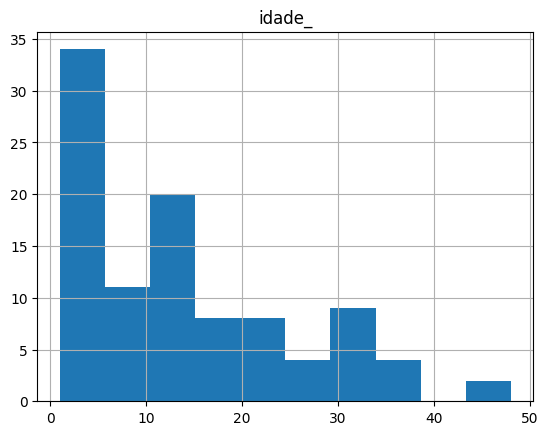

In [24]:
dft.hist()

In [7]:
q1,q2,q3=df['data_incio_atividade'].quantile([0.25, 0.5, 0.75])

In [11]:
q1

Timestamp('2004-08-26 00:00:00')

In [12]:
contagem_q1 = df[df['data_incio_atividade'] <= q1].count()[0]



In [13]:
contagem_q1

26

In [31]:
contagem_q1

34

In [32]:
contagem_q2

17

In [33]:
contagem_q3

24

In [36]:
max([contagem_q1,contagem_q2,contagem_q3])

34

In [18]:
count_age = df['idade'].value_counts().reset_index()

In [19]:
count_age

,index,idade
0,4 anos,10
1,5 anos,10
2,13 anos,8
3,30 anos,7
4,3 anos,6
5,11 anos,6
6,1 anos,4
7,2 anos,4
8,34 anos,4
9,23 anos,4


In [4]:
df2 = df [['cna_name','data_incio_atividade']]

In [5]:
df2['data_incio_atividade']=pd.to_datetime(df2['data_incio_atividade'].astype(str),format='%Y-%m-%d')

C:\Users\saulo\AppData\Local\Temp\ipykernel_14644\747669098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['data_incio_atividade']=pd.to_datetime(df2['data_incio_atividade'].astype(str),format='%Y-%m-%d')


In [6]:
df2=df2.sort_values('data_incio_atividade',ascending=False)

In [7]:
df2

,cna_name,data_incio_atividade
42,Construção de estações e redes de telecomunica...,2023-11-08
43,Construção de estações e redes de telecomunica...,2023-11-08
10,Construção de estações e redes de telecomunica...,2023-11-06
11,Construção de estações e redes de telecomunica...,2023-11-06
39,Construção de estações e redes de telecomunica...,2023-10-24
...,...,...
99,Construção de estações e redes de telecomunica...,1989-02-08
88,Construção de estações e redes de telecomunica...,1985-01-14
87,Construção de estações e redes de telecomunica...,1985-01-14
59,Construção de estações e redes de telecomunica...,1974-09-02


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 42 to 58
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cna_name              100 non-null    object        
 1   data_incio_atividade  100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 2.3+ KB


In [60]:
df2['Mes']=df2['data_incio_atividade'].dt.month
df2['Ano']=df2['data_incio_atividade'].dt.year
df2['mes-ano']=df2['Mes'].astype(str)+ '-'+ df2['Ano'].astype(str)

In [9]:
df2['Dif_Meses'] =df2['data_incio_atividade'].dt.to_period('M')



In [10]:
df_qtd = pd.DataFrame(df2[['cna_name','Dif_Meses']].groupby('Dif_Meses').count()).reset_index()

In [11]:
ultimo_valor = df_qtd['cna_name'].iloc[-1]
penultimo_valor = df_qtd['cna_name'].iloc[-2]

razao = ultimo_valor/penultimo_valor
razao

2.0

In [63]:
df2['Dif_Meses'] = df2['Dif_Meses'].dt.months


AttributeError: Can only use .dt accessor with datetimelike values

In [54]:
df2['Dif_Meses'] = df2['Dif_Meses'].fillna(0).astype(int)

C:\Users\saulo\AppData\Local\Temp\ipykernel_30636\3860089761.py:1: FutureWarning: The behavior of fillna with timedelta64[ns] dtype and an incompatible value (<class 'int'>) is deprecated. In a future version, this will cast to a common dtype (usually object) instead of raising, matching the behavior of other dtypes.
  df2['Dif_Meses'] = df2['Dif_Meses'].fillna(0).astype(int)


TypeError: value should be a 'Timedelta', 'NaT', or array of those. Got 'int' instead.

In [39]:
df_anterior = df2[df2['Dif_Meses'] == 1]

In [40]:
df_anterior

,cna_name,data_incio_atividade,Mes,Ano,mes-ano,Dif_Meses


In [35]:
df2[['cna_name','mes-ano']].groupby('mes-ano').count()

,cna_name
mes-ano,
1-1985,2
1-2016,2
10-1990,4
10-2011,2
10-2016,2
10-2020,1
11-1996,2
11-2001,2
11-2004,2


In [ ]:
from neuralprophet import NeuralProphet
import pandas as pd